In [1]:
# epsilon = ["nondp","500","100","50","40","30","20","10","5","4","3","2","1"]
# TPR_all = [0.8,0.74,0.74,0.72,0.72,0.71,0.70,0.68,0.65,0.65,0.63,0.61,0.57]
# TPR_white = [0.8,0.76,0.76,0.76,0.75,0.75,0.75,0.74,0.72,0.70,0.69,0.66,0.63]
# TPR_asian = [0.76,0.70,0.68,0.68,0.68,0.66,0.65,0.63,0.60,0.59,0.57,0.56,0.51]
# TPR_black= [0.84,0.77,0.77,0.74,0.73,0.72,0.71,0.67,0.65,0.64,0.63,0.62,0.57]
# TPR_female= [0.75,0.69,0.69,0.67,0.66,0.65,0.65,0.63,0.59,0.57,0.54,0.49,0.42]
# TPR_male= [0.84,0.79,0.78,0.77,0.77,0.77,0.75,0.72,0.71,0.71,0.71,0.72,0.71]
from metric_analysis import labels, subgroup_fairness_analysis
label = 0    # No finding
# label = 10 # Pleural effusion
print(labels[label])


No Finding


In [2]:
metric_non_dp = subgroup_fairness_analysis(0,'../data/chexpert.resample.test.csv','../disease/chexpert_new/disease/batch_150_epochs_20resnet-all/', 'predictions.resample.test.csv',verbose = False, plot =False )
epsilon_values = [10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

all_metrics = {}

for epsilon in epsilon_values:
    metric = subgroup_fairness_analysis(0, '../data/chexpert.resample.test.csv', '../disease/chexpert_new/diseasedp/batch_4096_epochs_100_lr_0.001_target_epsilon_' + str(epsilon) + '_target delta_1.3122498523718916e-05_max grad norm_1.2_nonli-resnetdp-all/', 'predictions.resample.test.csv', verbose=False, plot=False)
    all_metrics[epsilon] = metric
all_metrics[0.1] = subgroup_fairness_analysis(0, '../data/chexpert.resample.test.csv', '../disease/chexpert_new/diseasedp/batch_4096_epochs_150_lr_0.001_target_epsilon_0.1_target delta_1.3122498523718916e-05_max grad norm_1.2_nonli-resnetdp-all/', 'predictions.resample.test.csv', verbose=False, plot=False)

In [3]:
print(all_metrics[10])

{'All': {'TPR': 0.7625929861849097, 'FPR': 0.19998100845123923, 'AUC': 0.8504777161623227, 'AP': 0.36302098128608273}, 'White': {'TPR': 0.7791508238276299, 'FPR': 0.2086641155976926, 'AUC': 0.855461967377849, 'AP': 0.3910045165489408}, 'Asian': {'TPR': 0.7252223634053367, 'FPR': 0.1964530109489051, 'AUC': 0.8328742788840557, 'AP': 0.33162985736129347}, 'Black': {'TPR': 0.7836445589182228, 'FPR': 0.19486087450312317, 'AUC': 0.8657318381049226, 'AP': 0.3705200063029406}, 'Female': {'TPR': 0.7151056014692379, 'FPR': 0.18431940422010762, 'AUC': 0.8392083280619032, 'AP': 0.36012203930588615}, 'Male': {'TPR': 0.8035219628017412, 'FPR': 0.21327014218009477, 'AUC': 0.8610606607147286, 'AP': 0.3684258528537895}}


In [4]:

epsilon_values = [10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
TPR_all = [metric_non_dp['All']['TPR']]
TPR_white = [metric_non_dp['White']['TPR']]
TPR_asian = [metric_non_dp['Asian']['TPR']]
TPR_black= [metric_non_dp['Black']['TPR']]
TPR_female= [metric_non_dp['Female']['TPR']]
TPR_male= [metric_non_dp['Male']['TPR']]
for epsilon in epsilon_values:
    TPR_all.append(all_metrics[epsilon]['All']['TPR'])
    TPR_white.append(all_metrics[epsilon]['White']['TPR'])
    TPR_asian.append(all_metrics[epsilon]['Asian']['TPR'])
    TPR_black.append(all_metrics[epsilon]['Black']['TPR'])
    TPR_female.append(all_metrics[epsilon]['Female']['TPR'])
    TPR_male.append(all_metrics[epsilon]['Male']['TPR'])
epsilon_values.insert(0,'nondp') 
print(TPR_all)
print(TPR_white)
print(TPR_asian)
print(TPR_black)
print(TPR_female)
print(TPR_male)


[0.7981934112646121, 0.7625929861849097, 0.7633368756641871, 0.7633368756641871, 0.7709883103081828, 0.7536663124335813, 0.7607863974495218, 0.7521785334750266, 0.7426142401700319, 0.6988310308182785, 0.695855472901169, 0.6987247608926673, 0.6848034006376196, 0.6777895855472901, 0.6723698193411265, 0.6709883103081827, 0.6575982996811902, 0.6473963868225292, 0.6348565356004251, 0.5602550478214665]
[0.788339670468948, 0.7791508238276299, 0.7861216730038023, 0.7839036755386565, 0.7810519645120405, 0.7696451204055766, 0.7712294043092522, 0.7740811153358682, 0.7658428390367554, 0.7414448669201521, 0.7287705956907478, 0.7141951837769328, 0.7227503168567807, 0.7183143219264893, 0.7243346007604563, 0.7167300380228137, 0.7122940430925222, 0.6967680608365019, 0.6790240811153359, 0.6178707224334601]
[0.7662007623888183, 0.7252223634053367, 0.7121982210927573, 0.7179161372299873, 0.7350698856416773, 0.7128335451080051, 0.7115628970775095, 0.7398348157560356, 0.7141041931385006, 0.6464421855146124,

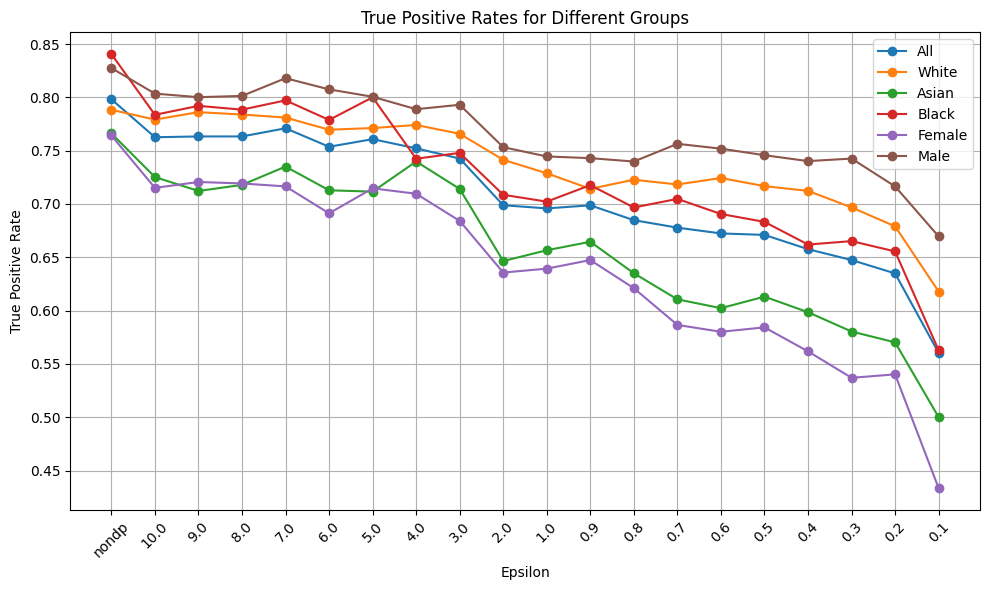

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(epsilon_values, TPR_all, marker='o', label='All')
plt.plot(epsilon_values, TPR_white, marker='o', label='White')
plt.plot(epsilon_values, TPR_asian, marker='o', label='Asian')
plt.plot(epsilon_values, TPR_black, marker='o', label='Black')
plt.plot(epsilon_values, TPR_female, marker='o', label='Female')
plt.plot(epsilon_values, TPR_male, marker='o', label='Male')

plt.xlabel('Epsilon')
plt.ylabel('True Positive Rate')
plt.title('True Positive Rates for Different Groups')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
epsilon_values = [10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
AP_all = [metric_non_dp['All']['AP']]
AP_white = [metric_non_dp['White']['AP']]
AP_asian = [metric_non_dp['Asian']['AP']]
AP_black = [metric_non_dp['Black']['AP']]
AP_female = [metric_non_dp['Female']['AP']]
AP_male = [metric_non_dp['Male']['AP']]

AUC_all = [metric_non_dp['All']['AUC']]
AUC_white = [metric_non_dp['White']['AUC']]
AUC_asian = [metric_non_dp['Asian']['AUC']]
AUC_black = [metric_non_dp['Black']['AUC']]
AUC_female = [metric_non_dp['Female']['AUC']]
AUC_male = [metric_non_dp['Male']['AUC']]

for epsilon in epsilon_values:
    AP_all.append(all_metrics[epsilon]['All']['AP'])
    AP_white.append(all_metrics[epsilon]['White']['AP'])
    AP_asian.append(all_metrics[epsilon]['Asian']['AP'])
    AP_black.append(all_metrics[epsilon]['Black']['AP'])
    AP_female.append(all_metrics[epsilon]['Female']['AP'])
    AP_male.append(all_metrics[epsilon]['Male']['AP'])
    
    AUC_all.append(all_metrics[epsilon]['All']['AUC'])
    AUC_white.append(all_metrics[epsilon]['White']['AUC'])
    AUC_asian.append(all_metrics[epsilon]['Asian']['AUC'])
    AUC_black.append(all_metrics[epsilon]['Black']['AUC'])
    AUC_female.append(all_metrics[epsilon]['Female']['AUC'])
    AUC_male.append(all_metrics[epsilon]['Male']['AUC'])

epsilon_values.insert(0, 'nondp') 

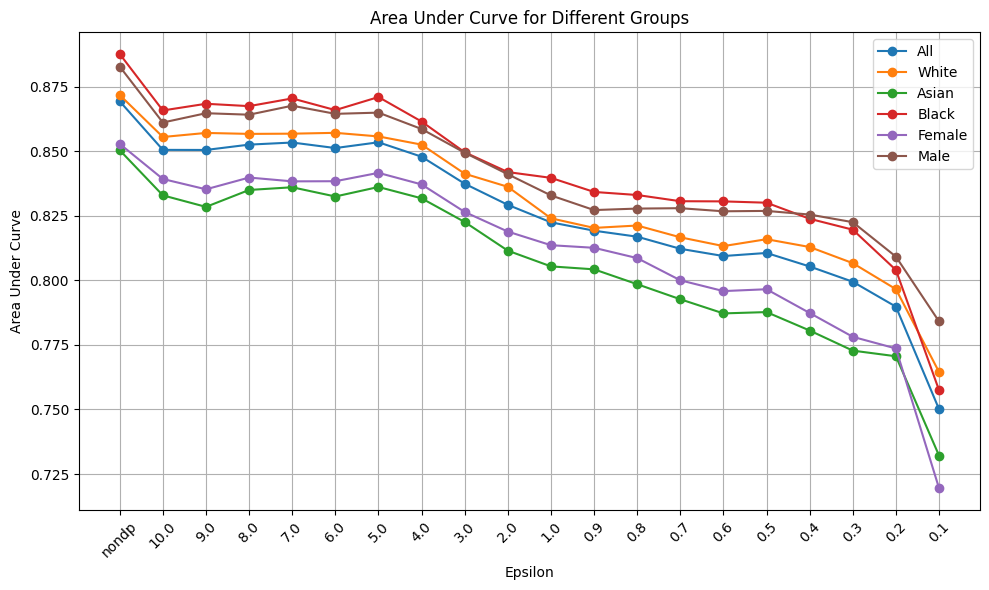

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(epsilon_values, AUC_all, marker='o', label='All')
plt.plot(epsilon_values, AUC_white, marker='o', label='White')
plt.plot(epsilon_values, AUC_asian, marker='o', label='Asian')
plt.plot(epsilon_values, AUC_black, marker='o', label='Black')
plt.plot(epsilon_values, AUC_female, marker='o', label='Female')
plt.plot(epsilon_values, AUC_male, marker='o', label='Male')

plt.xlabel('Epsilon')
plt.ylabel('Area Under Curve')
plt.title('Area Under Curve for Different Groups')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

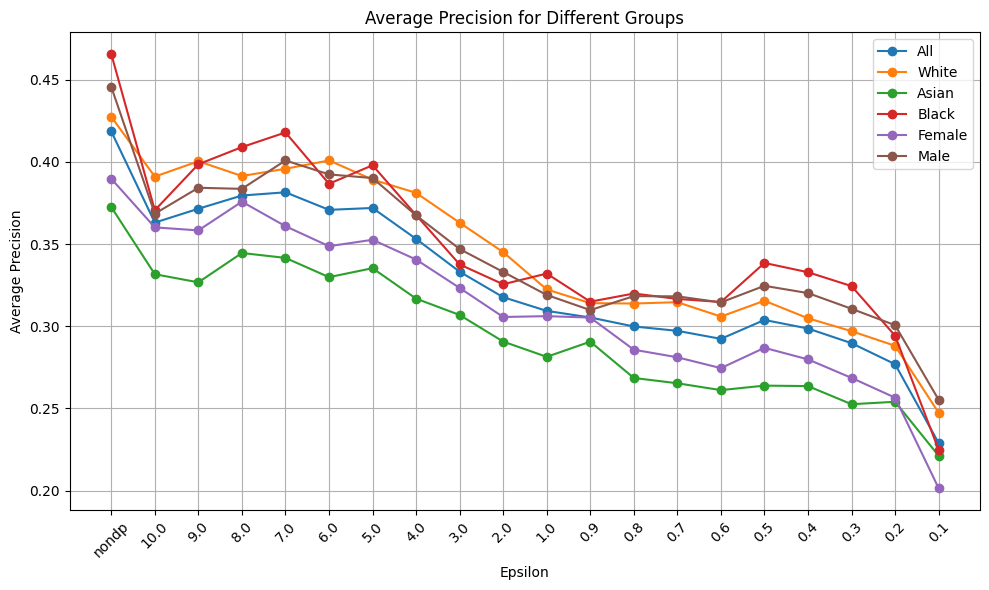

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(epsilon_values, AP_all, marker='o', label='All')
plt.plot(epsilon_values, AP_white, marker='o', label='White')
plt.plot(epsilon_values, AP_asian, marker='o', label='Asian')
plt.plot(epsilon_values, AP_black, marker='o', label='Black')
plt.plot(epsilon_values, AP_female, marker='o', label='Female')
plt.plot(epsilon_values, AP_male, marker='o', label='Male')

plt.xlabel('Epsilon')
plt.ylabel('Average Precision')
plt.title('Average Precision for Different Groups')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

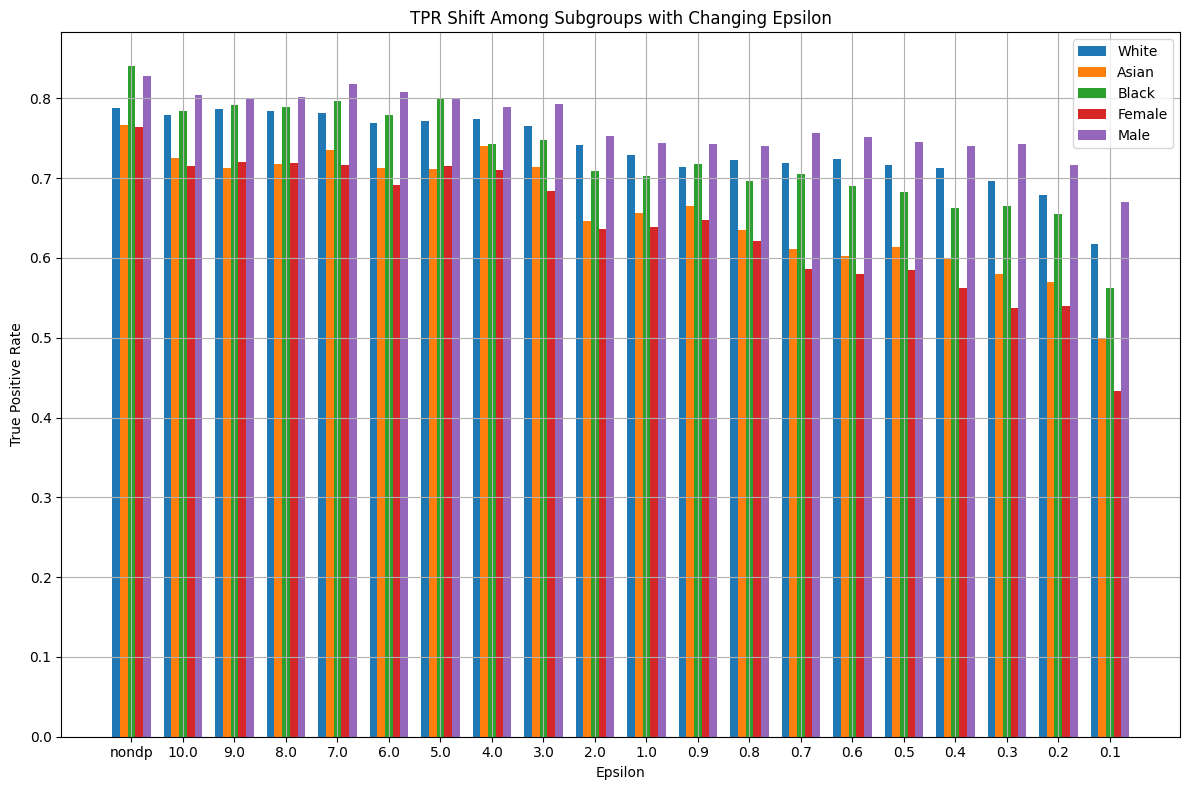

In [9]:
import numpy as np
bar_width = 0.15
index = np.arange(len(epsilon_values))

plt.figure(figsize=(12, 8))

plt.bar(index, TPR_white, bar_width, label='White')
plt.bar(index + bar_width, TPR_asian, bar_width, label='Asian')
plt.bar(index + 2*bar_width, TPR_black, bar_width, label='Black')
plt.bar(index + 3*bar_width, TPR_female, bar_width, label='Female')
plt.bar(index + 4*bar_width, TPR_male, bar_width, label='Male')

plt.xlabel('Epsilon')
plt.ylabel('True Positive Rate')
plt.title('TPR Shift Among Subgroups with Changing Epsilon')
plt.xticks(index + 2*bar_width, epsilon_values)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

[0.00098565 0.00120723 0.0014263  0.00130011 0.00144881 0.00186706
 0.00155564 0.00077599 0.00146639 0.00231862 0.00164337 0.00126998
 0.00222903 0.00427413 0.00454886 0.00373545 0.00449614 0.00569124
 0.0044296  0.00698595]
[0.00023024 0.00016113 0.00025646 0.00016872 0.00020612 0.00018822
 0.00017638 0.00013913 0.00012902 0.00015379 0.00015485 0.00011121
 0.00015997 0.00022528 0.00028607 0.00027781 0.00034753 0.00043063
 0.00024959 0.00053226]


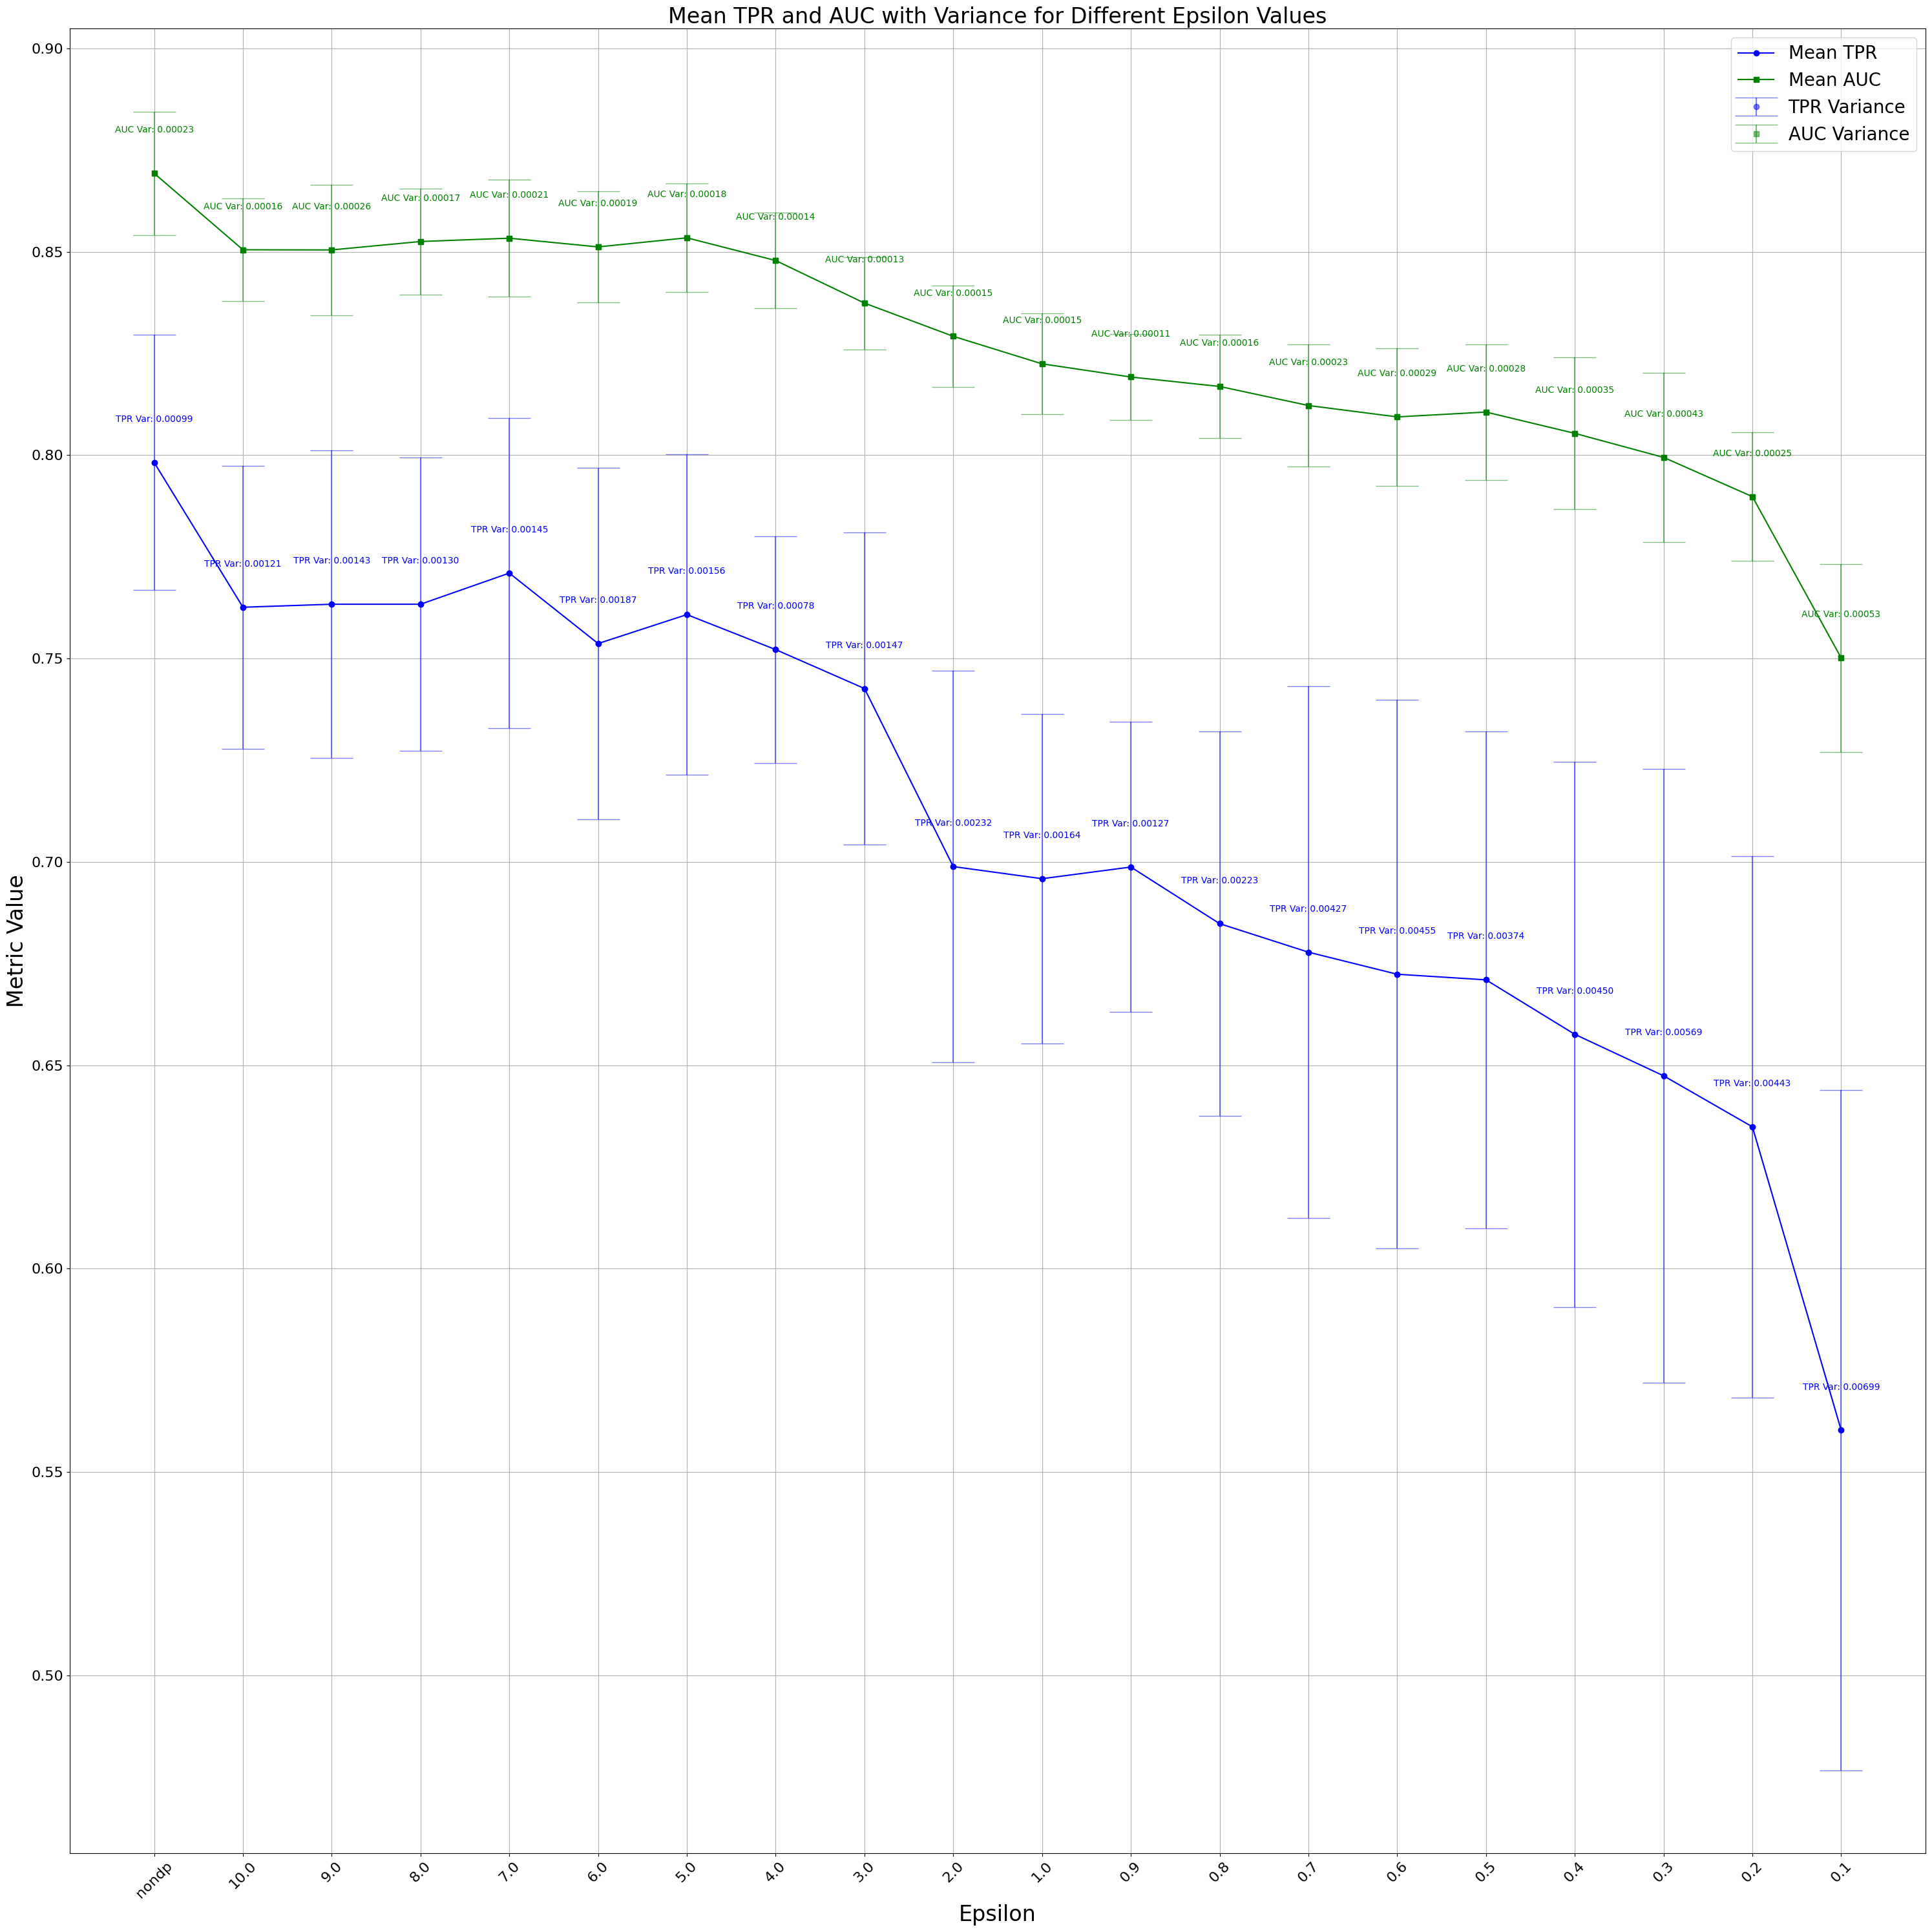

In [10]:
import numpy as np

epsilon_str = [str(eps) for eps in epsilon_values]
# Plot connected data points for mean TPR
import numpy as np
import matplotlib.pyplot as plt

# Define TPR and AUC values for all subgroups
TPR_values = [TPR_white, TPR_asian, TPR_black, TPR_female, TPR_male]
AUC_values = [AUC_white, AUC_asian, AUC_black, AUC_female, AUC_male]

# Convert TPR and AUC values to numpy arrays for easier computation
TPR_array = np.array(TPR_values)
AUC_array = np.array(AUC_values)

# Calculate variance for each epsilon value for TPR and AUC
variance_TPR = np.var(TPR_array, axis=0)
variance_AUC = np.var(AUC_array, axis=0)
print(variance_TPR)
print(variance_AUC)
# Plotting
plt.figure(figsize=(30, 30))

# Plot connected data points for mean TPR
plt.plot(epsilon_str, TPR_all, marker='o', linestyle='-', color='blue', label='Mean TPR')

# Plot error bars representing variance for TPR
plt.errorbar(epsilon_str, TPR_all, yerr=np.sqrt(variance_TPR), fmt='o', capsize=24, color='blue', alpha=0.5, label='TPR Variance')

# Plot connected data points for mean AUC
plt.plot(epsilon_str, AUC_all, marker='s', linestyle='-', color='green', label='Mean AUC')

# Plot error bars representing variance for AUC
plt.errorbar(epsilon_str, AUC_all, yerr=np.sqrt(variance_AUC), fmt='s', capsize=24, color='green', alpha=0.5, label='AUC Variance')

# Add labels for variance values
for i, var_tpr, var_auc in zip(range(len(epsilon_str)), variance_TPR, variance_AUC):
    plt.text(epsilon_str[i], TPR_all[i] + 0.01, f'TPR Var: {var_tpr:.5f}', ha='center', color='blue')
    plt.text(epsilon_str[i], AUC_all[i] + 0.01, f'AUC Var: {var_auc:.5f}', ha='center', color='green')


plt.xlabel('Epsilon', fontsize=24)
plt.ylabel('Metric Value', fontsize=24)
plt.title('Mean TPR and AUC with Variance for Different Epsilon Values', fontsize=24)
plt.legend(fontsize=20)
plt.grid(True)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()


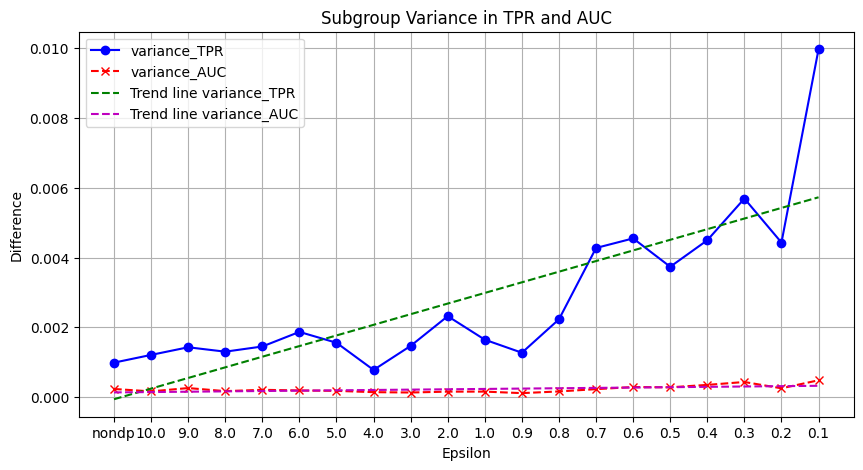

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
# Define epsilon values
epsilon_values = ['nondp', 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

# Define variance of TPR and AUC values
variance_TPR = [0.00098565, 0.00120723, 0.0014263, 0.00130011, 0.00144881, 0.00186706, 0.00155564, 0.00077599,
                0.00146639, 0.00231862, 0.00164337, 0.00126998, 0.00222903, 0.00427413, 0.00454886, 0.00373545,
                0.00449614, 0.00569124, 0.0044296, 0.00997417]

variance_AUC = [0.00023024, 0.00016113, 0.00025646, 0.00016872, 0.00020612, 0.00018822, 0.00017638, 0.00013913,
                0.00012902, 0.00015379, 0.00015485, 0.00011121, 0.00015997, 0.00022528, 0.00028607, 0.00027781,
                0.00034753, 0.00043063, 0.00024959, 0.00047995]

variance_TPR = np.array(variance_TPR) 
variance_AUC = np.array(variance_AUC) 
# Compute trend lines using linear regression
slope_TPR, intercept_TPR, _, _, _ = linregress(range(len(variance_TPR)), variance_TPR)
trend_line_TPR = slope_TPR * np.arange(len(variance_TPR)) + intercept_TPR

slope_AUC, intercept_AUC, _, _, _ = linregress(range(len(variance_AUC)), variance_AUC)
trend_line_AUC = slope_AUC * np.arange(len(variance_AUC)) + intercept_AUC


# Plotting
plt.figure(figsize=(10, 5))

# Plot differences
plt.plot(epsilon_values[0:],variance_TPR, marker='o', linestyle='-', color='b', label='variance_TPR')
plt.plot(epsilon_values[0:],variance_AUC, marker='x', linestyle='--', color='r', label='variance_AUC')

# Plot trend lines
plt.plot(epsilon_values[0:],trend_line_TPR, linestyle='--', color='g', label='Trend line variance_TPR')
plt.plot(epsilon_values[0:],trend_line_AUC, linestyle='--', color='m', label='Trend line variance_AUC')

plt.title('Subgroup Variance in TPR and AUC')
plt.xlabel('Epsilon')
plt.xticks()  # Set x-axis
plt.ylabel('Difference')
plt.legend()
plt.grid(True)

plt.show()


(20,)


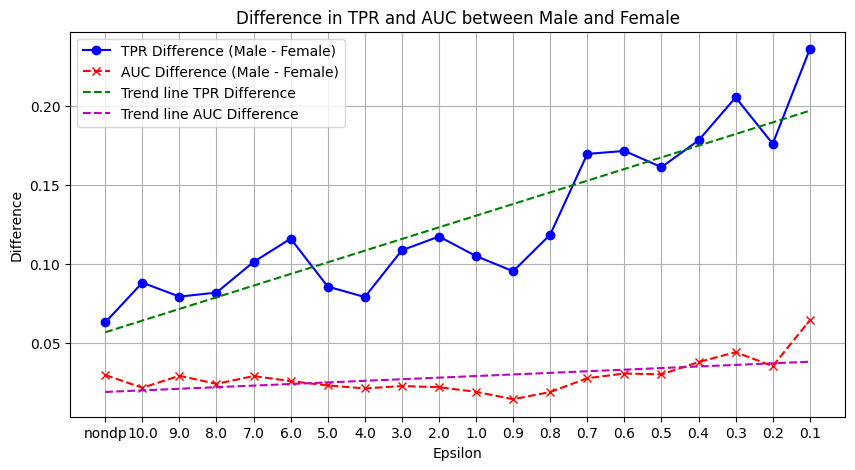

In [12]:
from scipy.stats import linregress

TPR_male_female_diff = np.array(TPR_male) - np.array(TPR_female)
AUC_male_female_diff = np.array(AUC_male) - np.array(AUC_female)

# Compute trend lines using linear regression
slope_TPR, intercept_TPR, _, _, _ = linregress(range(len(TPR_male_female_diff)), TPR_male_female_diff)
trend_line_TPR = slope_TPR * np.arange(len(TPR_male_female_diff)) + intercept_TPR

slope_AUC, intercept_AUC, _, _, _ = linregress(range(len(AUC_male_female_diff)), AUC_male_female_diff)
trend_line_AUC = slope_AUC * np.arange(len(AUC_male_female_diff)) + intercept_AUC

# Compute trend lines using linear regression
slope_TPR, intercept_TPR, _, _, _ = linregress(range(len(TPR_male_female_diff)), TPR_male_female_diff)
trend_line_TPR = slope_TPR * np.arange(len(TPR_male_female_diff)) + intercept_TPR

slope_AUC, intercept_AUC, _, _, _ = linregress(range(len(AUC_male_female_diff)), AUC_male_female_diff)
trend_line_AUC = slope_AUC * np.arange(len(AUC_male_female_diff)) + intercept_AUC

# Plotting
plt.figure(figsize=(10, 5))

print(TPR_male_female_diff.shape)
# Plot differences
plt.plot(epsilon_values[0:],TPR_male_female_diff, marker='o', linestyle='-', color='b', label='TPR Difference (Male - Female)')
plt.plot(epsilon_values[0:],AUC_male_female_diff, marker='x', linestyle='--', color='r', label='AUC Difference (Male - Female)')

# Plot trend lines
plt.plot(epsilon_values[0:],trend_line_TPR, linestyle='--', color='g', label='Trend line TPR Difference')
plt.plot(epsilon_values[0:],trend_line_AUC, linestyle='--', color='m', label='Trend line AUC Difference')

plt.title('Difference in TPR and AUC between Male and Female')
plt.xlabel('Epsilon')
plt.xticks()  # Set x-axis
plt.ylabel('Difference')
plt.legend()
plt.grid(True)

plt.show()